这个例子就使用了多项数据，一个地区的平均收入，平均房龄，房间数量，卧室数量，地区人口等可能多个可能影响房价的因素，对房价做出预测。

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from sklearn.preprocessing import StandardScaler
# 导入拆分数据集用的工具包
from sklearn.model_selection import train_test_split
# 导入线性回归模型
from sklearn.linear_model import LinearRegression
# 导入计算参数的工具包
from sklearn import metrics
# 从源文件加载数据，并输出查看数据的各项特征
data = pd.read_csv("USA_Housing.csv")
# lines = np.loadtxt('USA_Housing.csv', delimiter=',', dtype='str')
headers = data.columns

lines = data[1:].astype(float)
print('数据特征：', ', '.join(headers[:-1]))     # 除最后一列以外的数据是特征数据
print('数据标签：', headers[-1])                 # 数据的最后一列Price是Label
print('数据总条数：', len(data))
data.info()

数据特征： Avg. Area Income, Avg. Area House Age, Avg. Area Number of Rooms, Avg. Area Number of Bedrooms, Area Population
数据标签： Price
数据总条数： 5000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


我们可以看到，一共有5000条数据，每条数据有6个字段。
没有缺失数据。
在这个例子中，数据比较完整，不需要进行数据清洗。

In [27]:
# 数据归一化
data = data[:-1]
print("归一化以前的原始数据：")
print(data)
scaler = StandardScaler()
scaler.fit(data)             # 使用训练集的数据计算均值和方差
data = scaler.transform(data)
print("归一化以后的计算数据：")
print(data)

price = data[:,-1]
# 去掉房价，留下的房间数存入rooms列表
featureData = data[:, :-1]



归一化以前的原始数据：
      Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4994      73060.846226             5.293682                   6.312253   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   

      Avg. Area Number of Bedrooms  Area Population         Price  
0                             4

In [41]:
# 划分训练数据和测试数据
X_train, X_test, y_train, y_test = train_test_split(featureData, price, test_size=0.2, random_state=42)
print(X_train)
print(X_test)

[[-1.14044483 -2.34256656 -0.03688512  0.23391878  0.87823598]
 [ 0.74876378  1.23846187 -0.48026273 -0.47913031 -2.19109266]
 [-0.62403     0.71626862 -0.23525093  0.2906386  -0.20337372]
 ...
 [-0.2240953   0.53532609 -0.37379082 -0.68170107  0.11360444]
 [-0.92787568  1.42976478  2.2683982   0.27443294  1.3904406 ]
 [-0.6963043  -0.08160035  0.88751675  1.66811979 -0.01287175]]
[[-0.179738    0.20953657  0.87022358 -0.51154163  1.09967091]
 [ 1.94244219 -0.57499305 -0.18960006 -1.24079638 -1.00605658]
 [-0.53505476  0.20014847 -0.47793711 -1.50818979 -1.36843524]
 ...
 [-1.00489421  1.34620328  0.68746763 -0.53585012 -0.77091821]
 [-0.29604117  0.79250611  0.10428067  0.93886504  0.29311493]
 [-0.25135468  0.33111487  0.40140564 -0.58446711  0.76966564]]


### 下面使用sklearn的线性回归模型来进行计算。

In [42]:
from sklearn.linear_model import LinearRegression

# 初始化线性模型
linreg = LinearRegression()
# LinearRegression的方法中已经考虑了线性回归的常数项，所以无须再拼接1
linreg.fit(X_train, y_train)

# coef_是训练得到的回归系数，intercept_是常数项
print('回归系数：', linreg.coef_, linreg.intercept_)
y_pred = linreg.predict(X_test)

# 计算预测值和真实值之间的RMSE
rmse_loss = np.sqrt(np.square(y_test - y_pred).mean())
print('RMSE：', rmse_loss)

回归系数： [0.65211336 0.46577632 0.33980835 0.01137962 0.42583868] -0.0017600695280003652
RMSE： 0.2829769935368464
[[-1.14044483 -2.34256656 -0.03688512  0.23391878  0.87823598]
 [ 0.74876378  1.23846187 -0.48026273 -0.47913031 -2.19109266]
 [-0.62403     0.71626862 -0.23525093  0.2906386  -0.20337372]
 ...
 [-0.2240953   0.53532609 -0.37379082 -0.68170107  0.11360444]
 [-0.92787568  1.42976478  2.2683982   0.27443294  1.3904406 ]
 [-0.6963043  -0.08160035  0.88751675  1.66811979 -0.01287175]]
[[-0.179738    0.20953657  0.87022358 -0.51154163  1.09967091]
 [ 1.94244219 -0.57499305 -0.18960006 -1.24079638 -1.00605658]
 [-0.53505476  0.20014847 -0.47793711 -1.50818979 -1.36843524]
 ...
 [-1.00489421  1.34620328  0.68746763 -0.53585012 -0.77091821]
 [-0.29604117  0.79250611  0.10428067  0.93886504  0.29311493]
 [-0.25135468  0.33111487  0.40140564 -0.58446711  0.76966564]]


可以制造一组数据测试一下

In [55]:
x = [20000.0, 5.0, 10.0, 6.0, 36000.0]
#x=[61287, 5.86, 8.51, 5.13, 36882]
# 区域平均收入，区域平均房屋年龄，区域平均房间数，区域平均卧室数，区域人口
# 因为原来的scaler是针对6列数据生成的，所以做标准化前，需要增加一列房价数据。随便填一个
x.append(1000000)
print("制造的数据：", x)
# 改成scaler的transform需要的二维数组，只有一行数据
y = [x]
# 做标准化
y = scaler.transform(y)
print("标准化以后：", y)
# 进行预测前，需要去掉房价数据。删掉刚刚增加的数据。
zz =   np.delete(y[0],-1)
# 生成二维数组
z = np.array([zz])
print("送去预测的数据：", z)
# 使用模型预测
y_pred = linreg.predict(z)
# 模型预测出的数据是标准化后的结果，需要反向计算原来的数值。再把刚刚预测出的房价加到最后一列。
zzz = np.append(zz, y_pred)
print("输入数据和预测的输出：", zzz)
original_data = scaler.inverse_transform([zzz]) # 使用反向计算，从归一化数据算出原来对应的值
print("反向归一化：", original_data)
print("房价预计为：", original_data[0][-1])

制造的数据： [20000.0, 5.0, 10.0, 6.0, 36000.0, 1000000]
标准化以后： [[-4.55846947 -0.98564017  2.99471158  1.63570847 -0.01626751 -0.65717509]]
送去预测的数据： [[-4.55846947 -0.98564017  2.99471158  1.63570847 -0.01626751]]
预测的输出： [-4.55846947 -0.98564017  2.99471158  1.63570847 -0.01626751 -2.40417235]
反向归一化： [[2.00000000e+04 5.00000000e+00 1.00000000e+01 6.00000000e+00
  3.60000000e+04 3.83106688e+05]]
房价预计为： 383106.6880709735


C:\Python3.11\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### 下面使用的是梯度下降算法训练模型

回归系数： [ 0.65255895  0.46427021  0.34136895  0.01279476  0.42656665 -0.0018226 ]


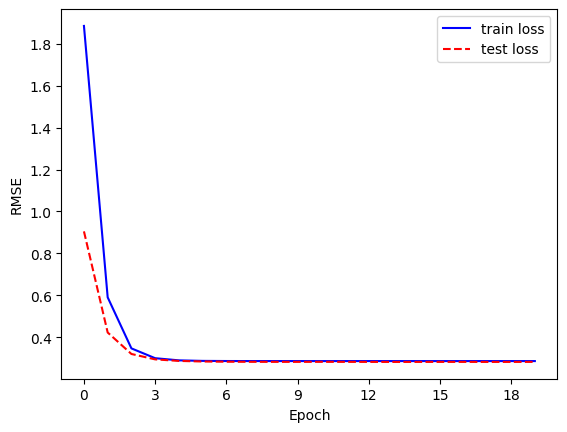

In [51]:
# 该函数每次返回大小为batch_size的批量
# x和y分别为输入和标签
# 若shuffle = True，则每次遍历时会将数据重新随机划分
def batch_generator(x, y, batch_size, shuffle=True):
    # 批量计数器
    batch_count = 0
    if shuffle:
        # 随机生成0到len(x)-1的下标
        idx = np.random.permutation(len(x))
        x = x[idx]
        y = y[idx]
    while True:
        start = batch_count * batch_size
        end = min(start + batch_size, len(x))
        if start >= end:
            # 已经遍历一遍，结束生成
            break
        batch_count += 1
        yield x[start: end], y[start: end]

def SGD(num_epoch, learning_rate, batch_size):
    # 拼接原始矩阵
    X = np.concatenate([X_train, np.ones((len(X_train), 1))], axis=-1)
    X_test1 = np.concatenate([X_test, np.ones((len(X_test), 1))], axis=-1)
    # 随机初始化参数
    theta = np.random.normal(size=X.shape[1])

    # 随机梯度下降
    # 为了观察迭代过程，我们记录每一次迭代后在训练集和测试集上的均方根误差
    train_losses = []
    test_losses = []
    for i in range(num_epoch):
        # 初始化批量生成器
        batch_g = batch_generator(X, y_train, batch_size, shuffle=True)
        train_loss = 0
        for x_batch, y_batch in batch_g:
            # 计算梯度
            grad = x_batch.T @ (x_batch @ theta - y_batch)
            # 更新参数
            theta = theta - learning_rate * grad / len(x_batch)
            # 累加平方误差
            train_loss += np.square(x_batch @ theta - y_batch).sum()
        # 计算训练和测试误差
        train_loss = np.sqrt(train_loss / len(X))
        train_losses.append(train_loss)
        test_loss = np.sqrt(np.square(X_test1 @ theta - y_test).mean())
        test_losses.append(test_loss)

    # 输出结果，绘制训练曲线
    print('回归系数：', theta)
    return theta, train_losses, test_losses

# 设置迭代次数，学习率与批量大小
num_epoch = 20
learning_rate = 0.01
batch_size = 32
# 设置随机种子
np.random.seed(0)

_, train_losses, test_losses = SGD(num_epoch, learning_rate, batch_size)
    
# 将损失函数关于运行次数的关系制图，可以看到损失函数先一直保持下降，之后趋于平稳
plt.plot(np.arange(num_epoch), train_losses, color='blue', 
    label='train loss')
plt.plot(np.arange(num_epoch), test_losses, color='red', 
    ls='--', label='test loss')
# 由于epoch是整数，这里把图中的横坐标也设置为整数
# 该步骤也可以省略
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.show()